In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, validation_curve,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae, confusion_matrix
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time
import sklearn.metrics as eva

In [2]:
social = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')

In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
social.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
diff = 257 - 143 
diff

114

In [7]:
social = social.append(social[social['Purchased'] == 1].sample(n=diff,replace=True))

In [8]:
social = social.drop('User ID', axis= 1)

In [9]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
social.shape

(514, 4)

In [11]:
LE = LabelEncoder()
social['Gender'] = LE.fit_transform(social['Gender'])

In [12]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [13]:
social['Age'] = minmax_scale(social[['Age']])
social['EstimatedSalary'] = minmax_scale(social[['EstimatedSalary']])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  


In [14]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [15]:
X = social.iloc[:, :-1]
Y = social.iloc[:, -1]
X.head() , Y.head()

(   Gender       Age  EstimatedSalary
 0       1  0.023810         0.029630
 1       1  0.404762         0.037037
 2       0  0.190476         0.207407
 3       0  0.214286         0.311111
 4       1  0.023810         0.451852, 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Purchased, dtype: int64)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

In [17]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
LR.predict(xtrain)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [19]:
score = accuracy_score(ytrain, LR.predict(xtrain))
score

0.8491484184914841

In [20]:
LR.predict(xtest)

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [21]:
score = accuracy_score(ytest, LR.predict(xtest))
score

0.8446601941747572

In [22]:
confusion_matrix(ytest, LR.predict(xtest))

array([[44,  7],
       [ 9, 43]], dtype=int64)

In [23]:
eva.precision_score(ytest, LR.predict(xtest))

0.86

In [24]:
eva.recall_score(ytest, LR.predict(xtest))

0.8269230769230769

In [25]:
f1_score(ytest, LR.predict(xtest))

0.8431372549019608

# CV

In [26]:
KNN = KNeighborsClassifier()
param_name = 'n_neighbors'
param_range = list(range(1, 20))
train_scores_knn, test_scores_knn = validation_curve(KNN, X, Y, param_name, param_range, cv = 10)

In [27]:
train_mean_scores_knn = np.mean(train_scores_knn, axis=1)
test_mean_scores_knn = np.mean(test_scores_knn, axis=1)

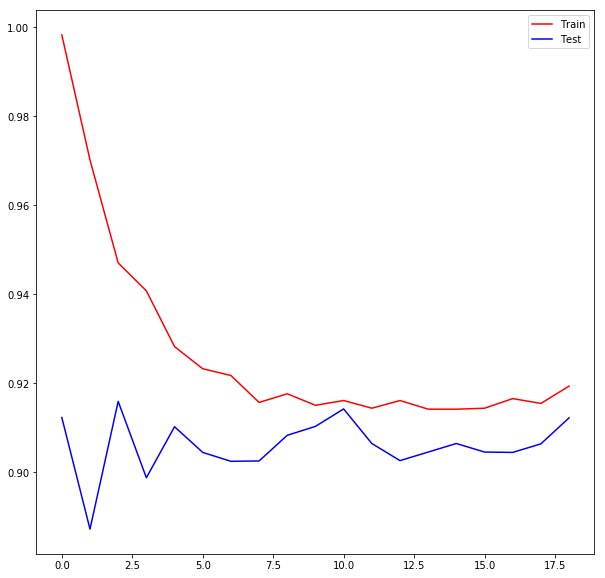

In [28]:
plt.figure(figsize=(10, 10))
plt.plot(train_mean_scores_knn, color = 'red')
plt.plot(test_mean_scores_knn, color = 'blue')
plt.legend(['Train', 'Test'])


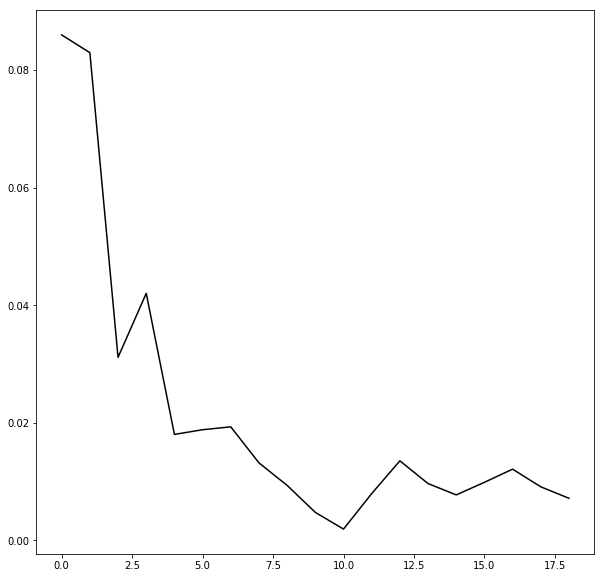

In [29]:
diff = train_mean_scores_knn - test_mean_scores_knn
plt.figure(figsize=(10, 10))
plt.plot(diff, color = 'black')

In [30]:
i = np.argmin(np.array(diff))
test_mean_scores_knn[i]

0.9142307692307693

# Logistic Regression

In [31]:
LR = LogisticRegression()
param_name = 'random_state' 
param_range = [0]
train_scores_lr, test_scores_lr = validation_curve(LR, X, Y, param_name, param_range, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [66]:
LR.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
ypred1 = LR.predict(xtest)

In [32]:
train_mean_scores_lr = np.mean(train_scores_lr, axis=1)
test_mean_scores_lr = np.mean(test_scores_lr, axis=1)

In [33]:
test_mean_scores_lr

array([0.83553846])

In [70]:
fpr1, tpr1, threshold1 = eva.roc_curve(ytest, LR.predict_proba(xtest)[:,1])
roc_auc1 = eva.auc(fpr1, tpr1)
print(roc_auc1)

0.9283559577677225


<IPython.core.display.Javascript object>


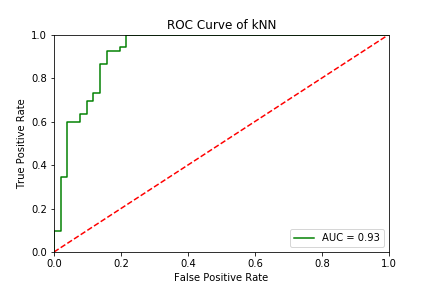

In [71]:
%matplotlib notebook
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# GridSearch

In [34]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
grid_params = {'n_neighbors' : list(range(1, 11)),
                'weights' : ['uniform', 'distance'], 
                 'metric' : ['euclidean'],
                  'p' : [1, 2, 3],
                'algorithm': ['ball_tree', 'kd_tree']
              }

In [36]:
GS = GridSearchCV(KNeighborsClassifier(), grid_params, cv=10, verbose = 1, scoring='accuracy', return_train_score=True)


In [37]:
start = time.time()

GD_result = GS.fit(xtrain, ytrain)
end = time.time()
time_diff = end - start
print(time_diff)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.088348388671875


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


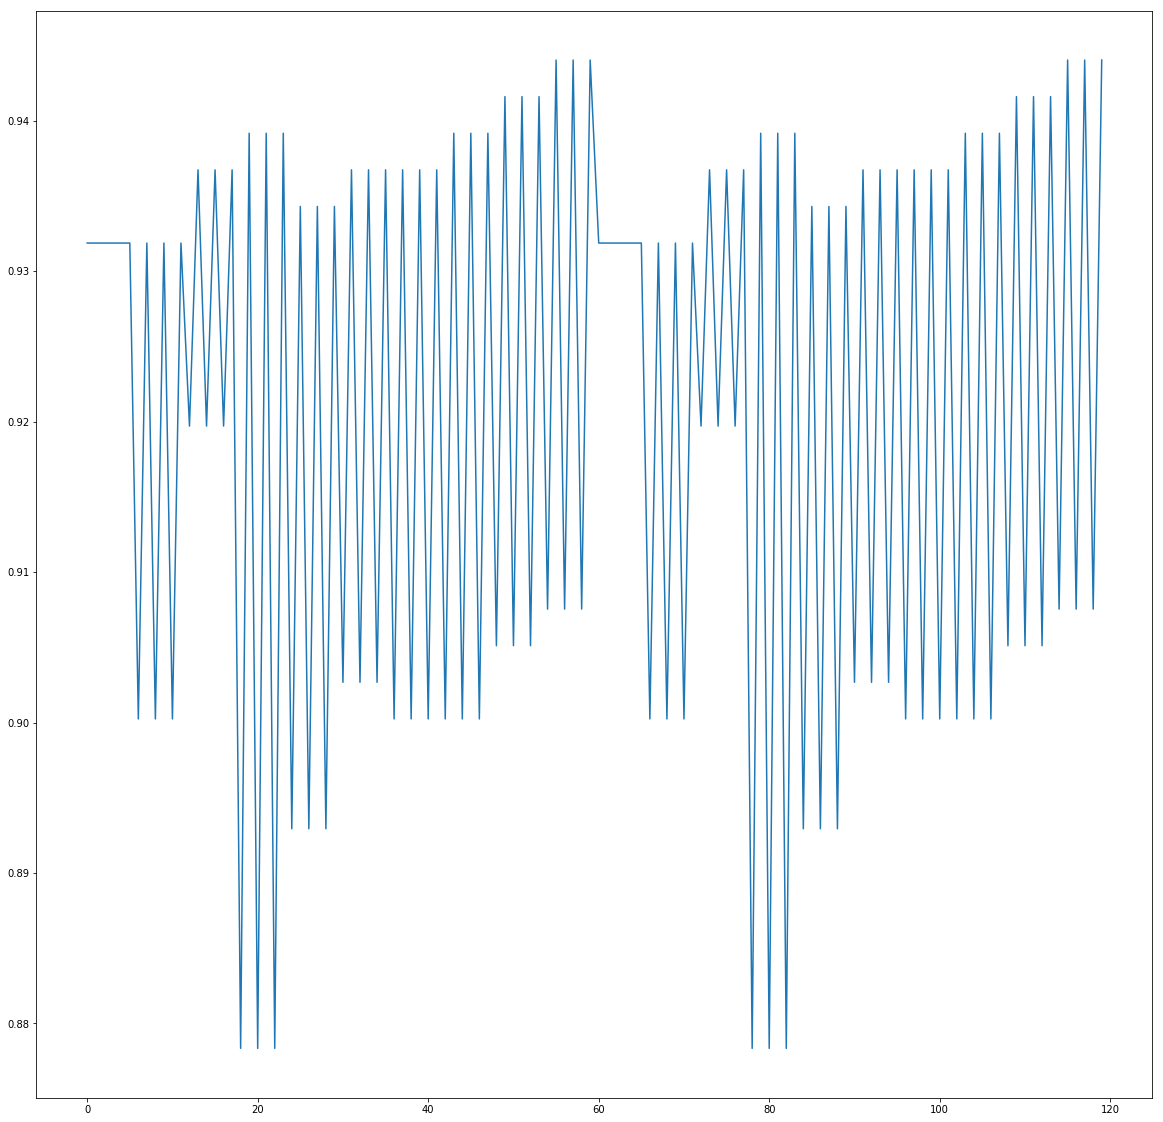

In [38]:
mean_test_score = GD_result.cv_results_['mean_test_score']
plt.figure(figsize=(20, 20))
plt.plot(mean_test_score)

In [39]:
Y = pd.DataFrame(Y)

In [40]:
GS.predict(xtest)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [41]:
accuracy_score(ytest, GS.predict(xtest))

0.912621359223301

In [42]:
confusion_matrix(ytest, GS.predict(xtest))

array([[46,  5],
       [ 4, 48]], dtype=int64)

In [43]:
GD_result.best_score_, GD_result.best_estimator_, GD_result.best_params_

(0.9440389294403893,
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=10, p=1,
            weights='distance'),
 {'algorithm': 'ball_tree',
  'metric': 'euclidean',
  'n_neighbors': 10,
  'p': 1,
  'weights': 'distance'})

In [56]:
pd.DataFrame(GD_result.cv_results_)[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.931873,0.044335,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
1,0.931873,0.044335,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
2,0.931873,0.044335,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
3,0.931873,0.044335,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
4,0.931873,0.044335,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."


In [45]:
mean_test_score = GD_result.cv_results_['mean_test_score']

In [46]:
mean_train_score = GD_result.cv_results_['mean_train_score']

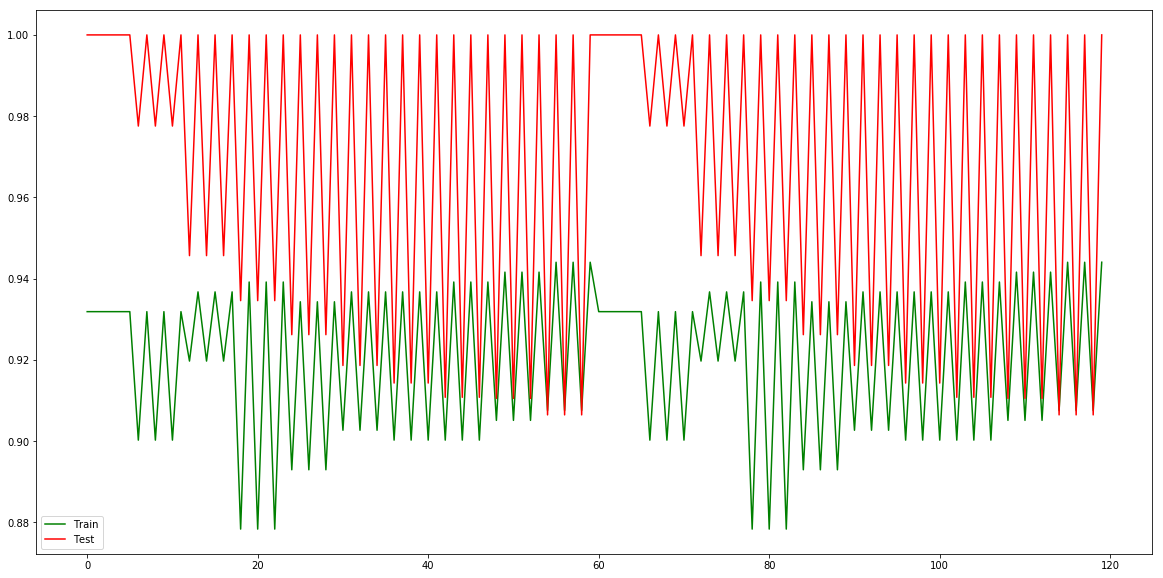

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score, color = 'green')
plt.plot(mean_train_score, color = 'red')
plt.legend(['Train', 'Test'])

In [48]:
diff = mean_test_score - mean_train_score

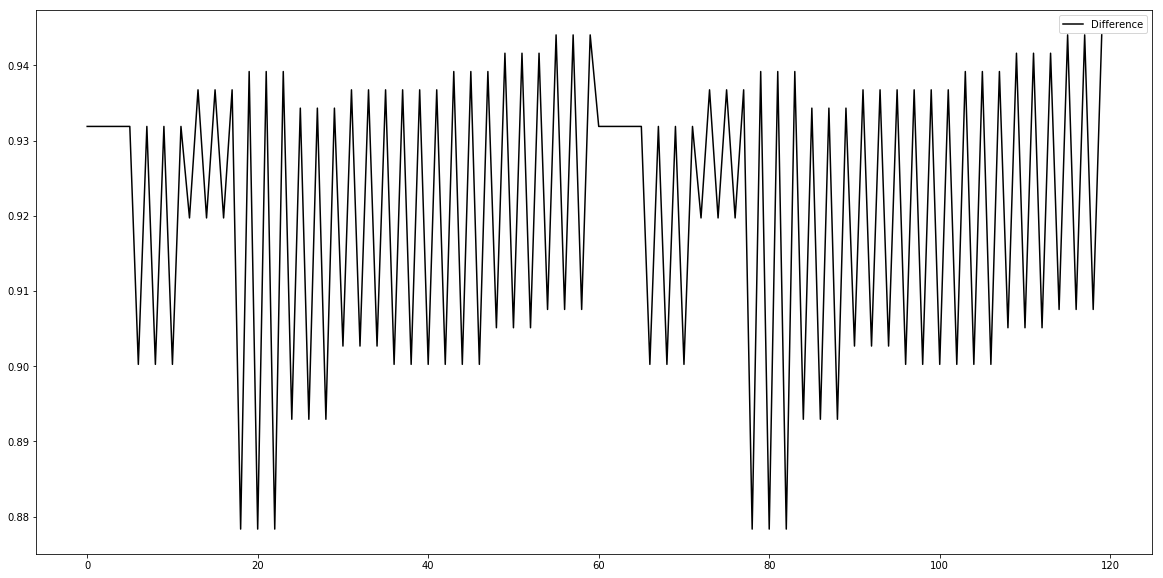

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score, color = 'black')
plt.legend(['Difference'])

In [ ]:
y_prop = GS.predict_proba

In [61]:
fpr, tpr, threshold = eva.roc_curve(ytest, GS.predict_proba(xtest)[:,1])
roc_auc = eva.auc(fpr, tpr)
print(roc_auc)

0.9500377073906485


<IPython.core.display.Javascript object>


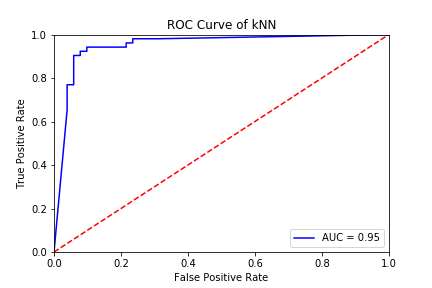

In [62]:
%matplotlib notebook
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

<IPython.core.display.Javascript object>


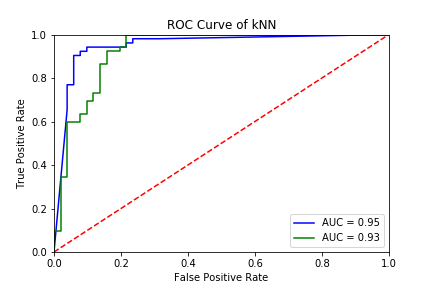

In [72]:
%matplotlib notebook
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'AUC = %0.2f' % roc_auc1)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Random Search

In [50]:
RS = RandomizedSearchCV(KNeighborsClassifier(), grid_params, cv=10, verbose = 1, scoring='accuracy', return_train_score=True)


In [51]:
start = time.time()

RS_result = RS.fit(X, Y)
end = time.time()
time_diff = end - start
print(time_diff)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\skl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

0.6870391368865967


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

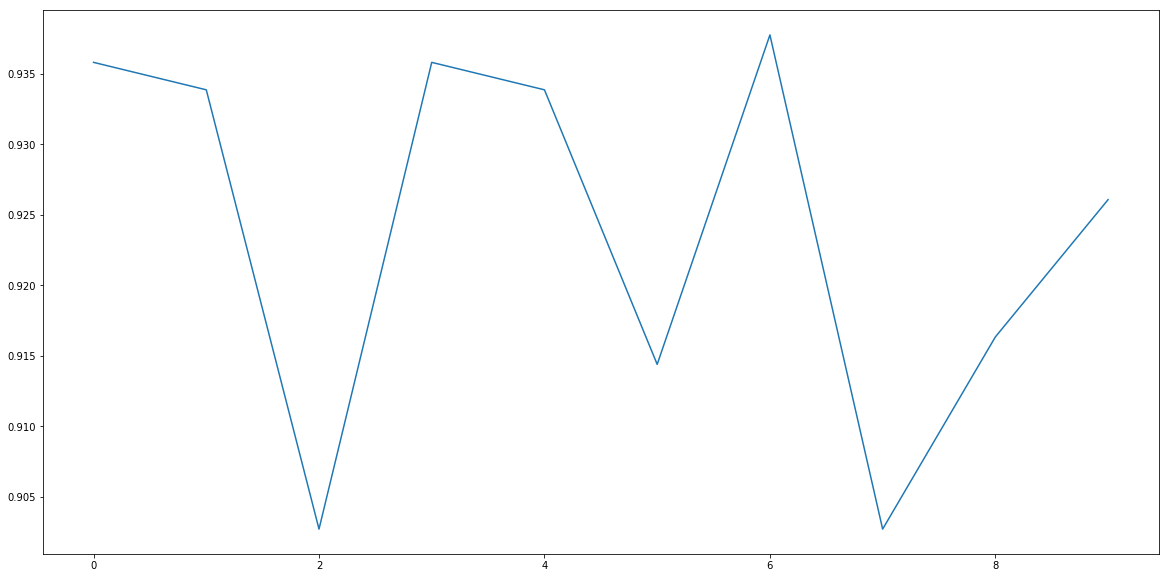

In [52]:
mean_test_score = RS_result.cv_results_['mean_test_score']
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score)

In [53]:
mean_train_score = RS_result.cv_results_['mean_train_score']
mean_test_score = RS_result.cv_results_['mean_test_score']

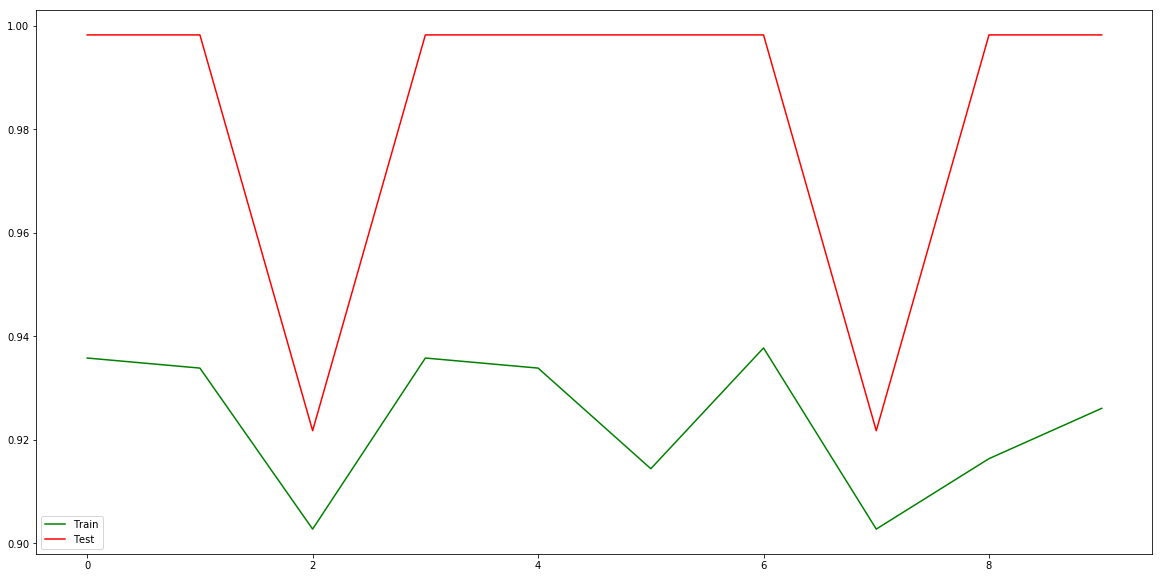

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score, color = 'green')
plt.plot(mean_train_score, color = 'red')
plt.legend(['Train', 'Test'])

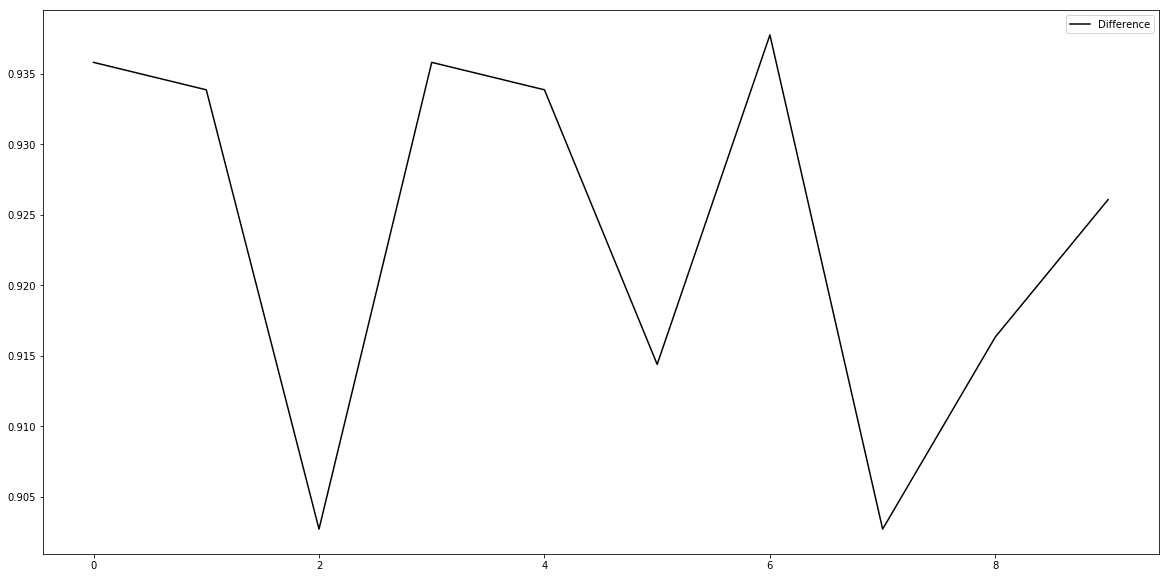

In [55]:
diff = mean_test_score - mean_train_score
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score, color = 'black')
plt.legend(['Difference'])